### TAXI COMPANIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st 

In [2]:
taxi_company=pd.read_csv('/datasets/project_sql_result_01.csv')
taxi_company.info()
taxi_company.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
company_name    64 non-null object
trips_amount    64 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [3]:
taxi_company.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [4]:
taxi_company[taxi_company.duplicated(keep=False)]

,company_name,trips_amount


There are 64 entries in the dataset, 2 columns. There are no missing or duplicated values. The data types are correct.

In [5]:
trips=pd.read_csv('/datasets/project_sql_result_04.csv')
trips.info()
trips.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
dropoff_location_name    94 non-null object
average_trips            94 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [6]:
trips.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


In [7]:
trips[trips.duplicated(keep=False)]

,dropoff_location_name,average_trips


There are 94 entries in the dataset, 2 columns. There are no missing or duplicated values. The type of average_trips should be change into integer.

In [8]:
trips['average_trips']=trips['average_trips'].astype(int)

* Let's find top 10 neighborhoods in terms of drop-offs.

In [9]:
top_10=trips.sort_values(by='average_trips', ascending=False).head(10)
top_10

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546
5,Lake View,2420
6,Grant Park,2068
7,Museum Campus,1510
8,Gold Coast,1364
9,Sheffield & DePaul,1259


* Let's see the distribution of rides for each taxi company on November 15-16, 2017.

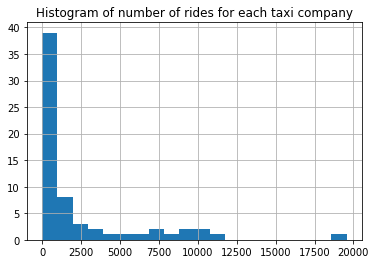

In [10]:
taxi_company['trips_amount'].hist(bins=20);
plt.title('Histogram of number of rides for each taxi company');

About 60% of the companies made up to 1000 rides on November 15-16, 2017. 11 taxi companies made between 1000 and 3000 rides, another 11 companies- (3000-10000] and 3 companies made more then 10000 rides during this period.  

The mean (2145 rides) is much higher then median (178), we have right-skewed distribution. It means we have some taxi companies with much higher number of rides then other companies that pushes "mean" up.

* Now let's look at the graph for top 10 neighborhoods by number of dropoffs.

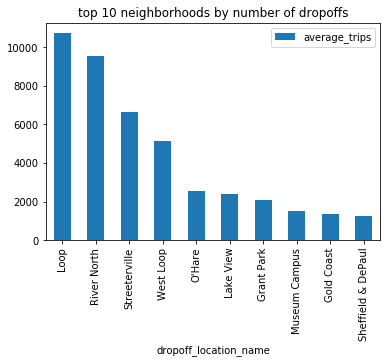

In [11]:
top_10.plot(x='dropoff_location_name', y='average_trips', kind='bar');
plt.title('top 10 neighborhoods by number of dropoffs');

We can see that neighborhood Loop is a leader in average number of rides that ended there during November.

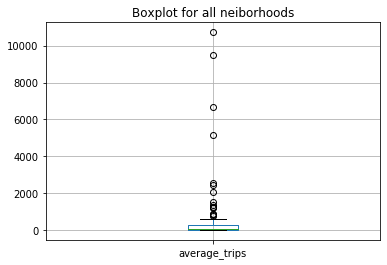

In [12]:
trips.boxplot(['average_trips']);
plt.title('Boxplot for all neiborhoods');

From the boxplot for all 94 neiborhoods we can see that our top 10 neiborhoods are outliers.

#### Testing hypothesis

In [13]:
weather=pd.read_csv('/datasets/project_sql_result_07.csv')
weather.info()
weather.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
start_ts              1068 non-null object
weather_conditions    1068 non-null object
duration_seconds      1068 non-null float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [14]:
bad_weather=weather.query('weather_conditions=="Bad"')
good_weather=weather.query('weather_conditions=="Good"')

Null hypothesis: The average duration of rides from the Loop to O'Hare International Airport is the same in "Good' and "Bad" weather conditions on Saturdays.
 
Alternative hypothesis: The average duration of rides in both weatherconditions is different. 

We have two different statistical populations. Let's set a critical statistical significance level to 0.05 and equal_var parameter to False. We assume that variences of our populations are not equal. We will use two sample t test. 

We'll test our hypothesis applying the method scipy.stats.ttest_ind().
If p-value less than ∝ we reject our Null hypothesis, otherwise we can't reject the Null hypothesis.



In [15]:
alpha = 0.05

results = st.ttest_ind(bad_weather['duration_seconds'], good_weather['duration_seconds'], equal_var = False)
print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value:  6.738994326108734e-12
We reject the null hypothesis


#### The p-value is less than 0.05, we reject the null hypothesis and conclude that there is difference between average duration of rides from the Loop to O'Hare International Airport in "Good' and "Bad" weather conditions on Saturdays.